## Function Descriptions


### `Runge_master(xm)`

e 4th order Runge-Kutta method. It takes in a vector `xm` of the current state variables and returns a vector of the updated state variables after one time step.



### `Runge_slave(xs, xm)`

 4th order Runge-Kutta method. It takes in two vectors `xs` and `xm` of the current state variables, and returns a vector of the updated state variables after one time step.

In [2]:
import numpy as np


##############################################################################################################
#################################################Runge_master##################################################
##############################################################################################################

def equations1(x):
    f = np.zeros(3)
    f[0] = x[1]
    f[1] = -ga * x[1] - np.sin(x[0]) + Gam*np.cos(Om*x[2])
    f[2] = 1
    return f

def Runge_master(xm):
    n = len(xm)
    x = np.zeros_like(xm)
    c1 = np.zeros_like(xm)
    c2 = np.zeros_like(xm)
    c3 = np.zeros_like(xm)
    c4 = np.zeros_like(xm)

    for i in range(n):
        x[i] = xm[i]
    f = equations1(x)
    for i in range(n):
        c1[i] = h*f[i]

    for i in range(n):
        x[i] = xm[i] + c1[i]/2
    f = equations1(x)
    for i in range(n):
        c2[i] = h*f[i]

    for i in range(n):
        x[i] = xm[i] + c2[i]/2
    f = equations1(x)
    for i in range(n):
        c3[i] = h*f[i]

    for i in range(n):
        x[i] = xm[i] + c3[i]
    f = equations1(x)
    for i in range(n):
        c4[i] = h*f[i]

    for i in range(n):
        xm[i] = xm[i] + (c1[i] + 2*c2[i] + 2*c3[i] + c4[i])/6

    return xm

##############################################################################################################
################################################Runge_slave####################################################
##############################################################################################################

def equations2(xs, xm):
    f = np.zeros(3)
    f[0] = xs[1]
    f[1] = -ga * xs[1] - np.sin(xs[0]) + Gam*np.cos(Om*xs[2]) + c * (np.sin(xs[0]) - np.sin(xm[0]))
    f[2] = 1
    return f

def Runge_slave(xs, xm):
    n = len(xs)
    x = np.zeros_like(xs)
    c1 = np.zeros_like(xs)
    c2 = np.zeros_like(xs)
    c3 = np.zeros_like(xs)
    c4 = np.zeros_like(xs)

    for i in range(n):
        x[i] = xs[i]
    f = equations2(x, xm)
    for i in range(n):
        c1[i] = h*f[i]

    for i in range(n):
        x[i] = xs[i] + c1[i]/2
    f = equations2(x, xm)
    for i in range(n):
        c2[i] = h*f[i]

    for i in range(n):
        x[i] = xs[i] + c2[i]/2
    f = equations2(x, xm)
    for i in range(n):
        c3[i] = h*f[i]

    for i in range(n):
        x[i] = xs[i] + c3[i]
    f = equations2(x, xm)
    for i in range(n):
        c4[i] = h*f[i]

    for i in range(n):
        xs[i] = xs[i] + (c1[i] + 2*c2[i] + 2*c3[i] + c4[i])/6

    return xs

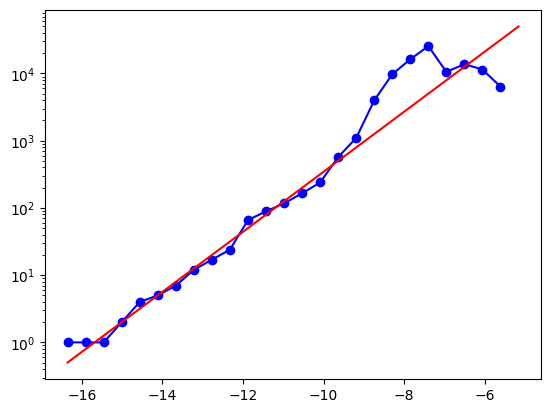

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# set parameters
ga  = 0.2
Gam = 1.2
Om  = 0.5
c   = 0.79
h = 0.001
Nit = 100000

# Initial conditions
tm = np.array([0.1, 0.2, 0])
ts = np.array([0.1, 0.2, 0])

# Define Runge_master and Runge_slave functions here


et = np.zeros(Nit)
v = np.zeros(Nit)
tmm = np.zeros((3, Nit))
tss = np.zeros((3, Nit))

for k in range(Nit):
    tm = Runge_master(tm)  
    ts = Runge_slave(ts, tm)
    
    et[k] = np.log(np.sqrt((ts[0]-tm[0])**2 + (ts[1]-tm[1])**2))
    v[k] = np.sqrt((ts[0]-tm[0])**2 + (ts[1]-tm[1])**2)
    tmm[:, k] = tm
    tss[:, k] = ts

yn, xn = np.histogram(et, 25)

plt.figure()
plt.semilogy(xn[:-1], yn, '-ob')

p = np.polyfit(xn[3:12], np.log(yn[3:12]), 1)

plt.semilogy(xn, np.exp(p[1])*np.exp(xn*p[0]), '-r')
plt.show()

## Classic Runge-Kutta method

In [5]:
import numpy as np


def equations1(x):
    f = np.zeros(3)
    f[0] = x[1]
    f[1] = -ga * x[1] - np.sin(x[0]) + Gam*np.cos(Om*x[2])
    f[2] = 1
    return f

def Runge_Kutta(xm):
    n = len(xm)
    x = np.zeros_like(xm)
    c1 = np.zeros_like(xm)
    c2 = np.zeros_like(xm)
    c3 = np.zeros_like(xm)
    c4 = np.zeros_like(xm)

    for i in range(n):
        x[i] = xm[i]
    f = equations1(x)
    for i in range(n):
        c1[i] = h*f[i]

    for i in range(n):
        x[i] = xm[i] + c1[i]/2
    f = equations1(x)
    for i in range(n):
        c2[i] = h*f[i]

    for i in range(n):
        x[i] = xm[i] + c2[i]/2
    f = equations1(x)
    for i in range(n):
        c3[i] = h*f[i]

    for i in range(n):
        x[i] = xm[i] + c3[i]
    f = equations1(x)
    for i in range(n):
        c4[i] = h*f[i]

    for i in range(n):
        xm[i] = xm[i] + (c1[i] + 2*c2[i] + 2*c3[i] + c4[i])/6

    return xm